<a href="https://colab.research.google.com/github/LeonimerMelo/CNNs/blob/main/Pretrained_VGG16_as_a_classifier_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#pretrained VGGNet-16 as a classifier
Using a pretrained network as a classifier doesn’t involve freezing any layers or doing extra model training. Instead, we just take a network that was trained on a similar problem and deploy it directly to our task. The pretrained model is used directly to classify new images with no changes applied to it and no extra training. All we do is download the network architecture and its pretrained weights and then run the predictions directly on our new data. In this case, we are saying that the domain of our new problem is very similar to the one that the pretrained network was trained on, and it is ready to be deployed.

##VGGNet-16 architecture
In the dog breed example, we could have used a VGG16 network that was trained
on an **ImageNet dataset** directly to run predictions. ImageNet already contains a lot of dog images, so a significant portion of the representational power of the pre-trained network may be devoted to features that are specific to differentiating
between dog breeds.

<center><img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png"></center>

The VGGNet architecture is developed by stacking 3 × 3 convolutional layers with
2 × 2 pooling layers inserted after several convolutional layers. This is followed by the traditional classifier, which is composed of fully connected layers and a softmax, as depicted in figure below.

<center><img src="https://raw.githubusercontent.com/moelgendy/deep_learning_for_vision_systems/2c9d077b43003657cd8f6d5ddfb6f83ee8bae1f3/chapter_05/images/vggnet_architecture.png" width=800></center>

VGGNet, has more than 144 million parameters.

##ImageNet

ImageNet is a research project to develop a large database of images with annotations, e.g. images and their descriptions.

The images and their annotations have been the basis for an image classification challenge called the ImageNet Large Scale Visual Recognition Challenge or ILSVRC since 2010. The result is that research organizations battle it out on pre-defined datasets to see who has the best model for classifying the objects in images.

The ImageNet Large Scale Visual Recognition Challenge is a benchmark in object category classification and detection on hundreds of object categories and millions of images. The challenge has been run annually from 2010 to present, attracting participation from more than fifty institutions.

For the classification task, images must be classified into one of 1,000 different categories.

For the last few years very deep convolutional neural network models have been used to win these challenges and results on the tasks have exceeded human performance.

<center><img src="https://machinelearningmastery.com/wp-content/uploads/2017/08/Sample-of-Images-from-the-ImageNet-Dataset-used-in-the-ILSVRC-Challenge.png"></center>

The CV community usually refers to the ImageNet Large Scale Visual Recognition
Challenge [(ILSVRC)](https://www.image-net.org/challenges/LSVRC/) when talking about ImageNet. In this challenge, software programs compete to correctly classify and detect objects and scenes. We will be using the ILSVRC challenge as a benchmark to compare the different networks’ performance.

###ImageNet Dataset Details
- Over 14 million images in high resolution.
- Around 22000 WordNet synonym sets (also known as synsets). A synset is a phrase that describes a meaningful concept in WordNet and ImageNet.
- Over one million annotated images with bounding boxes.
- 10,000+ synsets with scale-invariant feature transform (SIFT) features.
Over 1.2 million images with SIFT features.

###ImageNet Development Timeline

<center><img src="https://viso.ai/wp-content/uploads/2024/02/imagenet-winners-by-year.jpg" width=800></center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt

In [ ]:
# load the model
model = VGG16()
# model = VGG16(weights = "imagenet", include_top=True, input_shape = (224,224, 3))
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

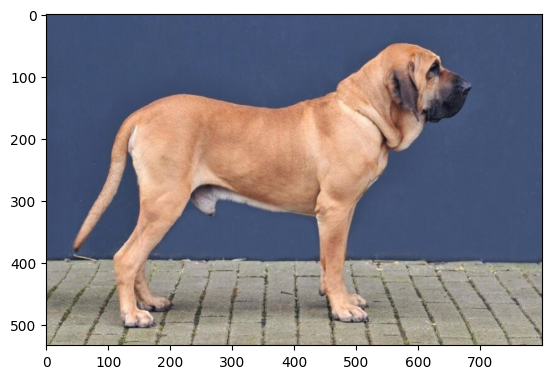

In [ ]:
# load an image from file
#img_name = 'warthog-2.jpg'
# img_name = 'Australian_terrier.jpeg'
# img_name = 'Yorkshire Terrier.jpg'
img_name = 'fila.jpg'
# img_name = 'bullmastiff2.jpg'
#img_name = 'Bedlington terrier.jpg'
#img_name = 'sinais-de-transito.jpg'
# img_name = 'street_sign.jpg'
#img_name = 'traffic_light.jpg'
path = '/content/drive/MyDrive/Colab Notebooks/images/' + img_name
image = load_img(path, target_size=(224, 224))
image2 = load_img(path)
plt.imshow(image2)
plt.show()

In [ ]:
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


In [ ]:
# print the first five classification
for i in range(5):
  print('%s (%.2f%%)' % (label[0][i][1], label[0][i][2]*100))

bull_mastiff (67.00%)
Great_Dane (22.72%)
bloodhound (9.36%)
Rhodesian_ridgeback (0.25%)
Tibetan_mastiff (0.22%)


In [ ]:
# as cinco primeiras previsões
label[0][0:5]

[('n02093647', 'Bedlington_terrier', 0.9788848),
 ('n02113799', 'standard_poodle', 0.02111131),
 ('n02113712', 'miniature_poodle', 3.808623e-06),
 ('n02113624', 'toy_poodle', 4.9254773e-08),
 ('n02105505', 'komondor', 9.4111305e-09)]

## Referências
[1] Elgendy, M. **Deep Learning for Vision Systems**. Manning Publications Co. Shelter Island, NY. 2020.

[2] https://www.image-net.org/challenges/LSVRC/index.php

[3] https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

[4] https://gist.github.com/aaronpolhamus/964a4411c0906315deb9f4a3723aac57

[5] https://medium.com/geekculture/boost-your-image-classification-model-with-pretrained-vgg-16-ec185f763104

[6] https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

[7] [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556), 2014.

[8] https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/

[9] https://opus.nci.org.au/display/DAE/Introduction+to+

[10] https://opus.nci.org.au/display/DAE/ImageNet+Classification+Hierarchy

[11] https://www.tensorflow.org/tutorials/images/transfer_learning

Exercícios:

1. Escolha 30 imagens de diferentes classes (ImageNet) e crie uma rotina para trabalhar/classificar essas imagens, armazená-las em uma pasta específica e demonstrar a classificação destas imagens via VGG16.

2. Monte um banco de dados com 10 imagens de cada classe a seguir e verifique a precisão/acurácia da rede na classificação:
* n03857828 870 oscilloscope
* n03782006 869 monitor
* n02988304 987 CD_player
* n03584254 980 iPod
* n03424325 971 gasmask
* n06794110 932 street_sign
* n02992529 914 cellular_telephone
* n06874185 861 traffic_light
* n03160309 720 dam
* n02894605 719 breakwater
* n04532670 682 viaduct
* n04153751 587 screw
* n03492542 573 hard_disc
* n02974003 563 car_wheel
* n06359193 553 web_site
* n03832673 552 notebook
* n03180011 550 desktop_computer
* n03485407 551 hand-held_computer
* n01496331 445 electric_ray
* n03642806 228 laptop
* n02412080 81 ram

3. Utilize três outras redes pré-treinadas e compare os rendimentos com os obtidos na VGG-16. Pesquise o modelos de rede disponíveis em [tensorflow keras](https://keras.io/api/applications/) e utilize as redes [Xception](https://keras.io/api/applications/xception/), [ResNet50](https://keras.io/api/applications/resnet/) e [EfficientNetB7](https://keras.io/api/applications/efficientnet/#efficientnetb7-function) para os testes.

###Contribuições dos alunos

In [ ]:
# Agoritmo para extrair automaticamente imagens da internet
# Contribuição de Tiago Guido Piai <tiago.guido.piai@uel.br>

pip install icrawler
from icrawler.builtin import GoogleImageCrawler, BingImageCrawler, BaiduImageCrawler
import os

# Lista de classes e seus nomes
classes = {
    '1': 'osciloscopio',
    '2': 'multimetro',
    # inserir classes que deseja baixar
}

# Número de imagens a serem baixadas por classe
num_images = 30

# Diretório para salvar as imagens
output_dir = 'images'
os.makedirs(output_dir, exist_ok=True)

# Função para baixar imagens
def download_images(keyword, class_dir, num_images, crawler_type='google'):
    if crawler_type == 'google':
        crawler = GoogleImageCrawler(storage={'root_dir': class_dir})
    elif crawler_type == 'bing':
        crawler = BingImageCrawler(storage={'root_dir': class_dir})
    elif crawler_type == 'baidu':
        crawler = BaiduImageCrawler(storage={'root_dir': class_dir})
    else:
        raise ValueError("Invalid crawler_type. Choose 'google', 'bing', or 'baidu'.")

    crawler.crawl(keyword=keyword, max_num=num_images)

# Iteração pelas classes para baixar as imagens
for class_id, class_name in classes.items():
    print(f"Baixando imagens para a classe: {class_name}")
    class_dir = os.path.join(output_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)
    try:
        # Tenta baixar usando Google
        download_images(class_name, class_dir, num_images, crawler_type='google')
    except Exception as e:
        print(f"Erro com Google: {e}. Tentando Bing...")
        try:
            # Se falhar no Google, tenta Bing
            download_images(class_name, class_dir, num_images, crawler_type='bing')
        except Exception as e:
            print(f"Erro com Bing: {e}. Tentando Baidu...")
            try:
                # Se falhar no Bing, tenta Baidu
                download_images(class_name, class_dir, num_images, crawler_type='baidu')
            except Exception as e:
                print(f"Erro ao baixar imagens para a classe {class_name}: {e}")